In [1]:
from qwak.State import State
from qwak.Operator import Operator
from qwak.QuantumWalk import QuantumWalk
from qwak.ProbabilityDistribution import ProbabilityDistribution
from qwak.qwak import QWAK


In [2]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import timeit
import sympy as sp
from sympy.abc import pi
from math import sqrt, ceil, pow

Start by creating your initial state:

In [3]:
n = 4
initNodes = [0,1,2,3]

initState = State(n,initNodes)
initState.buildState()
print(initState.getStateVec())

[[0.5+0.j]
 [0.5+0.j]
 [0.5+0.j]
 [0.5+0.j]]


Note that this creates a state that is the uniform superposition of the nodes in the initNodes list.

Alternatively, you can create a state with custom amplitudes.

In [4]:
graph = nx.cycle_graph(n)

operator = Operator(graph)
operator.buildDiagonalOperator(0.5)
print(operator.getOperator().round(3))

[[ 0.77-0.j    -0.  -0.421j -0.23-0.j    -0.  -0.421j]
 [-0.  -0.421j  0.77+0.j    -0.  -0.421j -0.23+0.j   ]
 [-0.23-0.j    -0.  -0.421j  0.77-0.j    -0.  -0.421j]
 [-0.  -0.421j -0.23+0.j    -0.  -0.421j  0.77+0.j   ]]


In [5]:
quantumWalk = QuantumWalk(initState,operator)
quantumWalk.buildWalk()
print(quantumWalk.getFinalState().getStateVec().round(3))

[[0.27-0.421j]
 [0.27-0.421j]
 [0.27-0.421j]
 [0.27-0.421j]]


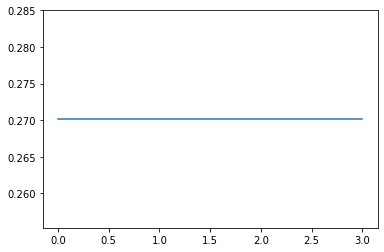

In [6]:
finalState = quantumWalk.getFinalState()
plt.plot(finalState.getStateVec())

In [7]:
probDist = ProbabilityDistribution(finalState)
probDist.buildProbDist()
print(probDist.getProbVec())

[0.25 0.25 0.25 0.25]


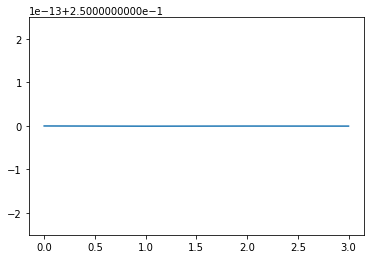

In [8]:
probDistVec = probDist.getProbVec()
plt.plot(probDistVec)

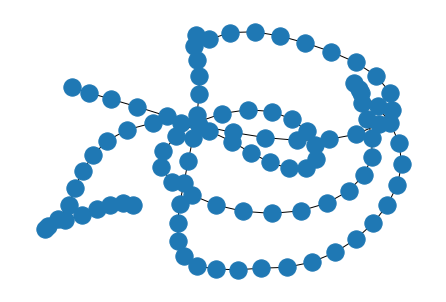

In [9]:
n = 100
t = 12
marked = [n//2, n//2 + 1]
graph = nx.path_graph(n)
nx.draw(graph)
qw = QWAK(graph,laplacian = True)

InitLen 1 100
InitLen 2 100


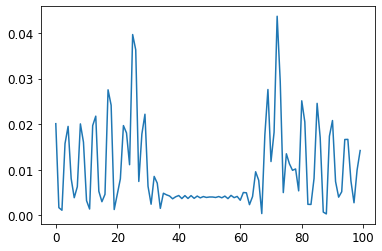

In [13]:
qw.runWalk(t,marked)

plt.plot(qw.getProbVec())

In [14]:
# print(list(qw.getProbDistVec()))
print(qw.getAmpVec().item(0))


(-0.13365685459078253-0.0472517950820454j)


In [23]:
qw3 = QWAK(nx.path_graph(n),laplacian = True)
qw3.runWalk(t,marked)

InitLen 1 200
InitLen 2 200


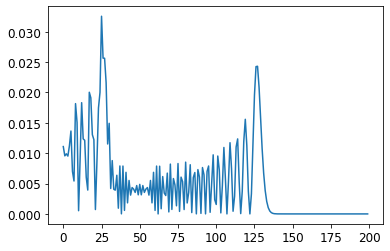

In [25]:
plt.plot(qw3.getProbVec())

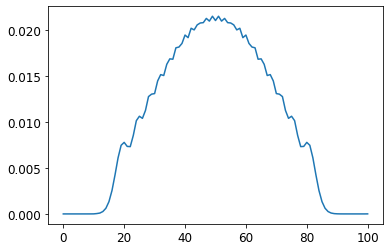

In [26]:
n = 100
t = 20
marked = [n//2]
graph = nx.cycle_graph(n)

noiseParam = 0.15
sinkNode = 10
sinkRate = 1.0

sqwController = StochasticQWAK(graph)
sqwController.runWalk(t, marked, noiseParam=noiseParam,sinkNode=sinkNode, sinkRate=sinkRate)

plt.plot(sqwController.getProbVec())

In [27]:
t = 40
n=200
graph = nx.circular_ladder_graph(n)
initNodes = [n//2,n//2 +1]
quantum_walk = QWAK(graph)
quantum_walk.runWalk(t, initNodes)

InitLen 1 400
InitLen 2 400


Text(0.5, 0, 'Graph Node')

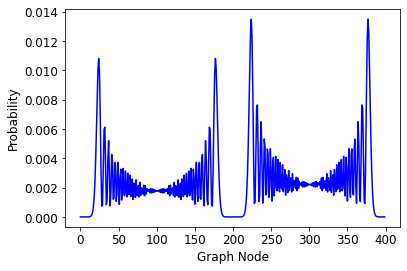

In [28]:
font = {'family': 'sans-serif',
            'size': 12}
plt.rc('font', **font)
plt.plot(quantum_walk.getProbVec(),linewidth=1.5,color='blue')
plt.ylabel("Probability")
plt.xlabel("Graph Node")